In [2]:
device = "cpu"
print("Starting")
import numpy as np
import cv2
import mediapipe as mp
import tensorflow as tf
from matplotlib import pyplot as plt

print("Fetched mediapipe")

print("Imports successful.")
# initiate mediapipe face detection
mpFaceDetectorObject = mp.solutions.face_detection
faceDetector = mpFaceDetectorObject.FaceDetection(min_detection_confidence=0)

print("Created Face Detector Object.")




Starting
Fetched mediapipe
Imports successful.
Created Face Detector Object.


In [3]:
data = tf.keras.utils.image_dataset_from_directory('data')
dataIterator = data.as_numpy_iterator()
batch = dataIterator.next()

# Class 1 = happy people
# Class 2 = sad people

# Run to visualize image and label
# fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])



Found 162 files belonging to 2 classes.


In [4]:
data = data.map(lambda x, y: (x/255, y))

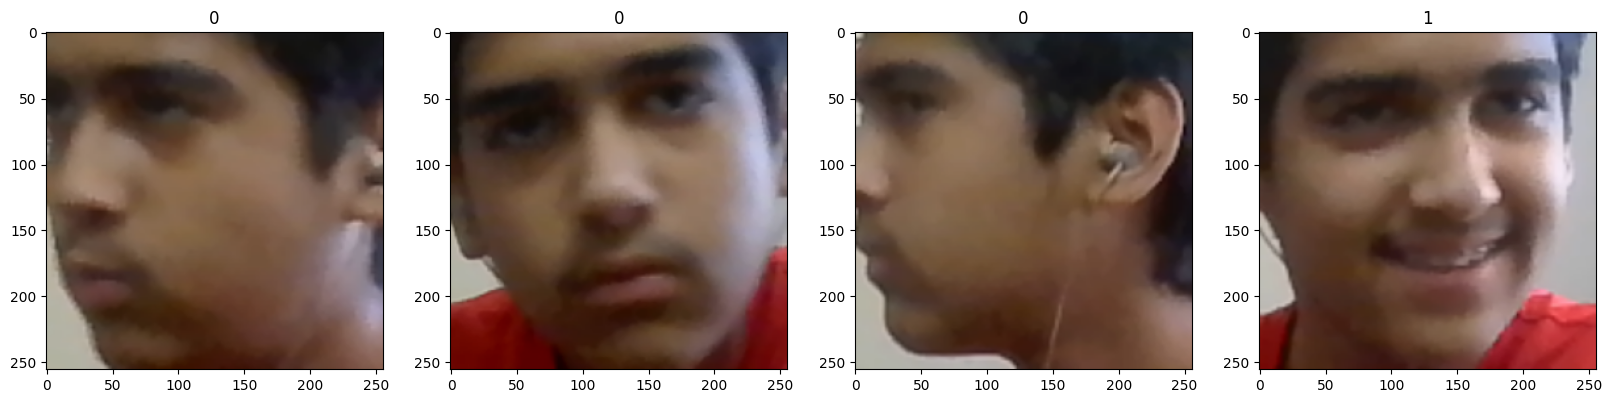

In [5]:
# visualize the new data
data.as_numpy_iterator().next()[0].max()
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [6]:

trainSize = int(len(data)*0.7)
valSize = int(len(data)*0.2)
testSize = int(len(data)*0.1)+1

print(trainSize, valSize, testSize, len(data))
train = data.take(trainSize)
val = data.skip(trainSize).take(valSize)
test = data.skip(trainSize+valSize).take(testSize)
len(test)

4 1 1 6


1

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


c:\Users\aarav\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
logdir = 'logs'
tensorboardCallback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboardCallback])

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.3625 - loss: 1.6218 - val_accuracy: 0.4375 - val_loss: 0.9029
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.4635 - loss: 0.8462 - val_accuracy: 0.5938 - val_loss: 0.6813
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.5229 - loss: 0.6902 - val_accuracy: 0.5625 - val_loss: 0.6900
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.5740 - loss: 0.6921 - val_accuracy: 0.6250 - val_loss: 0.6904
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.8292 - loss: 0.6889 - val_accuracy: 0.4688 - val_loss: 0.6933
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.5562 - loss: 0.6968 - val_accuracy: 0.4062 - val_loss: 0.6921
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.5302 - loss: 0.6841 - val_accuracy: 0.8125 - val_loss: 0.6784
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.6708 - loss: 0.6761 - val_accuracy: 0.5000 - val_loss:

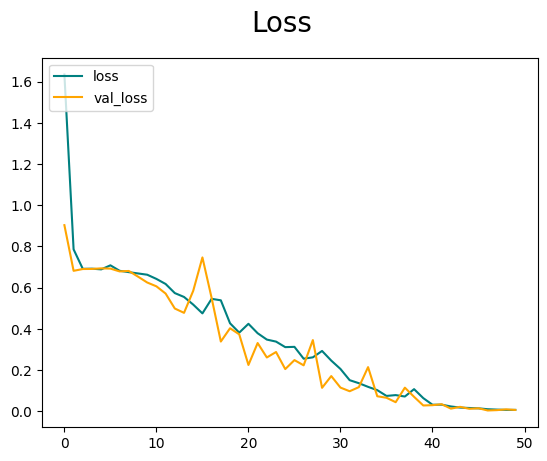

In [13]:
# visualize loss over time
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [14]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [15]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [16]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Precision: 0.0, Recall: 0.0, Accuracy: 1.0


In [ ]:
# test processing
if False:
    pic = cv2.imread('assets/tosnip.png')

    results = faceDetector.process(pic)
    detections = results.detections
    bbox = detections[0].location_data.relative_bounding_box
    x, y, w, h = (
        int(bbox.xmin * pic.shape[1]),
        int(bbox.ymin * pic.shape[0]),
        int(bbox.width * pic.shape[1]),
        int(bbox.height * pic.shape[0])
    )
    # cv2.rectangle(pic, (x, y), (x + w, y + h), (0, 255, 255), 2)
    # cv2.putText(pic, str(round(detections[0].score[0], 2)), (x+int(w/2.5), y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)


    # get pixel coords for bounding box of face
    # pic[y][x] = (255, 255, 255)
    # pic[y][x+w] = (255, 255, 255)
    # pic[y+h][x] = (255, 255, 255)
    # pic[y+h][x+w] = (255, 255, 255)

    # grab just the face
    justFace = pic[y:y+h+1, x:x+w+1]
    # resize the face
    justFace = cv2.resize(justFace, (200, 200))
    # save justFace
    cv2.imwrite("assets/face0.png", justFace)
    cv2.imshow("Frame", justFace)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [18]:
# main loop to test and recognize
if not False:
    capture = cv2.VideoCapture(0)
    print("Initiated Live Feed")
    dataCount = 81
    collectData = True
    # get data from video feed
    while dataCount<=114:
        ret, frame = capture.read()
        if not ret:
            print("Camera not found.")
            break

        # pass frame to mediapipe face detector to get landmarks of face
        results = faceDetector.process(frame)
        detections = results.detections
        key = cv2.waitKey(1) 
        if key == ord(" "):
            break
        if detections:
            coords = []
            for idx, detection in enumerate(detections):
                bbox = detection.location_data.relative_bounding_box
                x, y, w, h = (
                    int(bbox.xmin * frame.shape[1]),
                    int(bbox.ymin * frame.shape[0]),
                    int(bbox.width * frame.shape[1]),
                    int(bbox.height * frame.shape[0])
                )
                # add and subtract vals to remove border inside picture
                coords.append((x+2, y+2, h-4, w-4))
                # draw bounding box
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 2)
                cv2.putText(frame, str(round(detection.score[0], 2)), (x+int(w/2.5), y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)
            if key == ord("s"):
                for i, coord in enumerate(coords):
                    x, y, h, w = coord
                    # grab just the face
                    justFace = frame[y:y+h+1, x:x+w+1]
                    justFace = cv2.resize(justFace, (200, 200))
                    
                    resize = tf.image.resize(justFace, (256, 256))
                    yhat = model.predict(np.expand_dims(resize/255, 0))
                    if yhat > 0.5:
                        print("Smile Detected")
                    else:
                        print("Not Smile Detected")

                    # save justFace
                    if collectData:
                        cv2.imwrite(f"data/smile/face{dataCount}.png", justFace) # data/notsmile or smile face nonface
                        dataCount += 1
                    else:
                        cv2.imwrite(f"assets/notface{i}.png", justFace)
            # print(f"{len(detections)} faces detected.")
        else:
            print("0 faces detected.")    
        cv2.imshow("Frame", frame)

    capture.release()
    cv2.destroyAllWindows()

Initiated Live Feed
0 faces detected.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Smile Detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Smile Detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Smile Detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Smile Detected
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Not Smile Detected
0 faces detected.
0 faces detected.
0 faces detected.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Smile Detected
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces detected.
0 faces de

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
if False:
    model.save('models/smileModel.h5')

In [ ]:
model = load_model('models/smileModel.h5')